# Trends and Predictions in Netflix's Daily Top 10 Rankings

## Data Wrangling

In this section, we will prepare our dataset for analysis by addressing inconsistencies and ensuring data quality. The dataset includes Netflix's daily top 10 rankings for movies and TV shows in the United States from 2020 to March 2022, featuring attributes like title, release date, type, and viewership metrics.

Our focus will be on handling missing values, standardizing data types, and rectifying anomalies to ensure the data is clean and consistent. This foundational step is crucial for accurate analysis and model building, enabling us to explore trends, identify key factors influencing viewership scores, and develop predictive models to forecast rankings.

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [36]:
# Load the dataset
df = pd.read_csv('netflix daily top 10.csv')

# Display the first few rows of the dataframe
df.head()


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [37]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 0


In [38]:
# Check data types and basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [39]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [40]:
# Check for any syntactic rule violations (e.g., date format)
# Convert 'As of' column to datetime
df['As of'] = pd.to_datetime(df['As of'], format='%Y-%m-%d')

# Ensure 'Netflix Release Date' follows the same format
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'], errors='coerce')

# Check for any semantic rule violations
# Ensure 'Rank' is between 1 and 10
assert df['Rank'].between(1, 10).all(), "Rank column contains values outside 1-10"

In [41]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


In [42]:
# Check the percentage of missing values in 'Netflix Exclusive'
missing_percentage = df['Netflix Exclusive'].isnull().mean() * 100
print(f"Percentage of missing values in 'Netflix Exclusive': {missing_percentage:.2f}%")


Percentage of missing values in 'Netflix Exclusive': 35.23%


In [43]:

# Replace missing values in 'Netflix Exclusive' with 'No'
df['Netflix Exclusive'].fillna('No', inplace=True)


# Verify there are no more missing values
missing_values_after = df['Netflix Exclusive'].isnull().sum()
print(f"Missing values in 'Netflix Exclusive' after imputation: {missing_values_after}")


Missing values in 'Netflix Exclusive' after imputation: 0


#### Summary

In this data wrangling section, we systematically prepared the Netflix daily top 10 rankings dataset for analysis. We started by loading the dataset and inspecting its initial structure, followed by removing duplicate rows to ensure data integrity. We then checked and corrected data types, particularly for date columns, and verified that the 'Rank' column contained valid values between 1 and 10. To handle missing values in the "Netflix Exclusive" column, which had 35.23% missing data, we replaced the missing entries with the value 'No'. These steps ensured that our dataset is clean, consistent, and ready for further analysis.

## Exploratory Data Analysis (EDA)

In this step, we'll use Tableau to explore the Netflix daily top 10 dataset, aiming to uncover insights that will guide our analysis. We'll examine data dimensions, statistical properties, and relationships among key variables. This will help us understand the dataset's structure and inform decisions about modeling and integration with business workflows. Key activities include creating data flow diagrams, visualizing data properties, and determining how our analysis will integrate with existing workflows and evaluate impact.

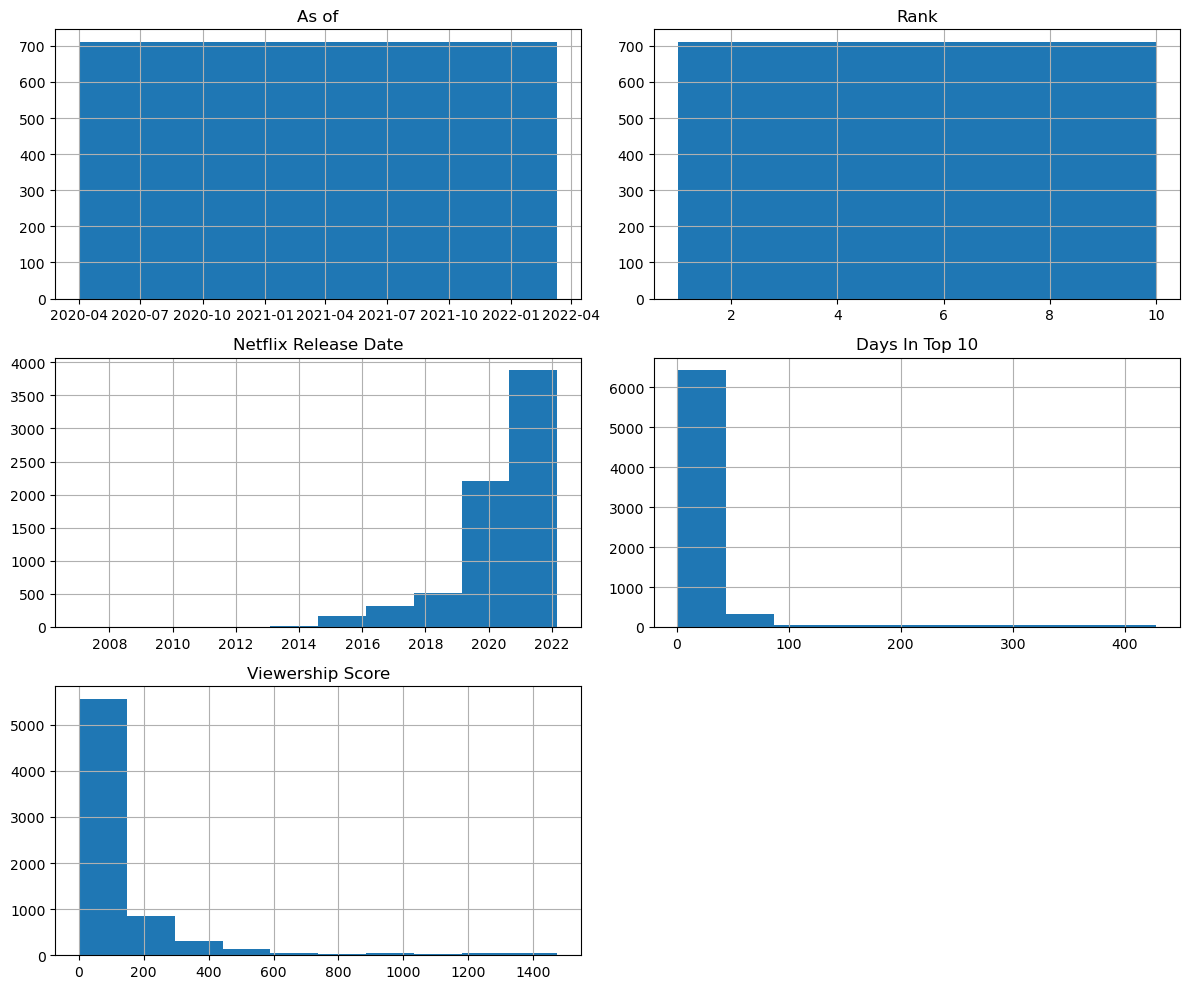

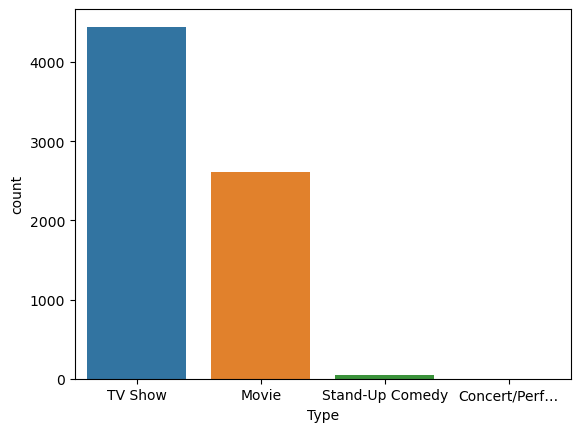

In [44]:
# Distribution of numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Distribution of categorical features
sns.countplot(data=df, x='Type')
plt.show()


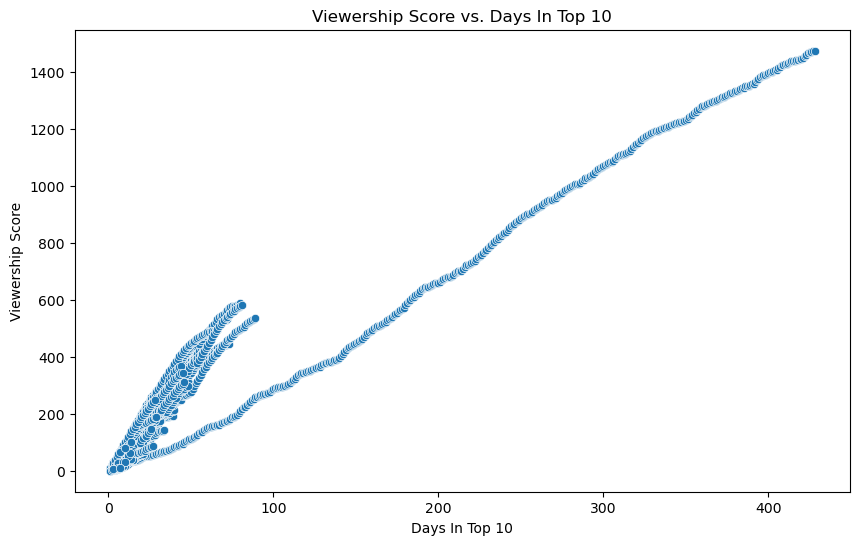

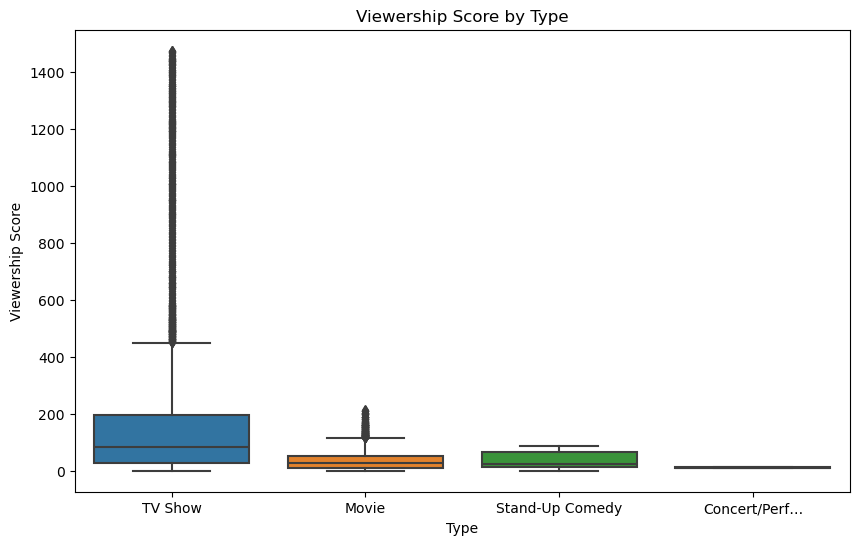

In [45]:
# Scatter plot of Viewership Score vs. Days In Top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days In Top 10', y='Viewership Score', data=df)
plt.title('Viewership Score vs. Days In Top 10')
plt.xlabel('Days In Top 10')
plt.ylabel('Viewership Score')
plt.show()

# Box plot for Viewership Score by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Viewership Score', data=df)
plt.title('Viewership Score by Type')
plt.xlabel('Type')
plt.ylabel('Viewership Score')
plt.show()


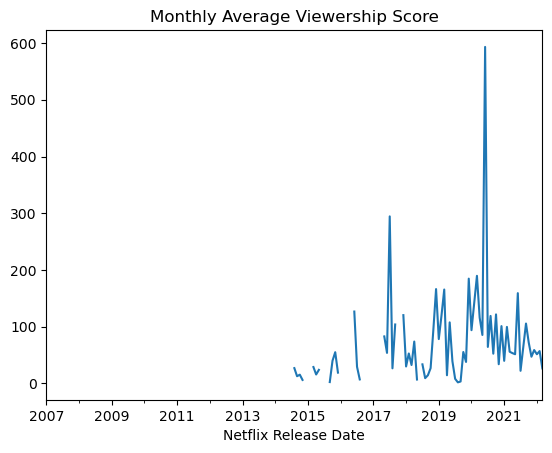

In [46]:
# Time series trend (if applicable)
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df.set_index('Netflix Release Date', inplace=True)
df['Viewership Score'].resample('M').mean().plot()
plt.title('Monthly Average Viewership Score')
plt.show()


Netflix Exclusive
Yes    4599
No     2501
Name: count, dtype: int64


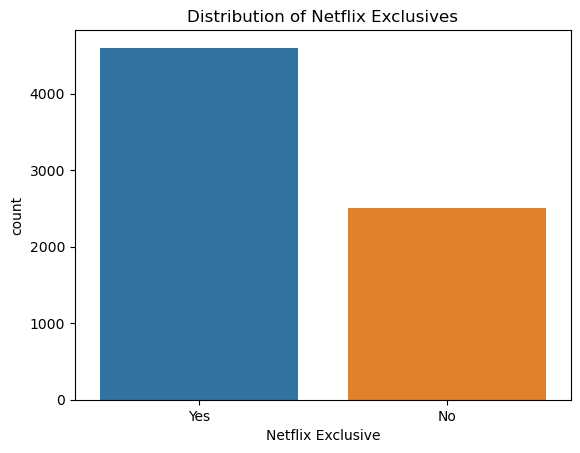

In [47]:
# Recheck distribution of 'Netflix Exclusive'
exclusive_summary = df['Netflix Exclusive'].value_counts()
print(exclusive_summary)

# Plot the distribution of 'Netflix Exclusive'
sns.countplot(data=df, x='Netflix Exclusive')
plt.title('Distribution of Netflix Exclusives')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


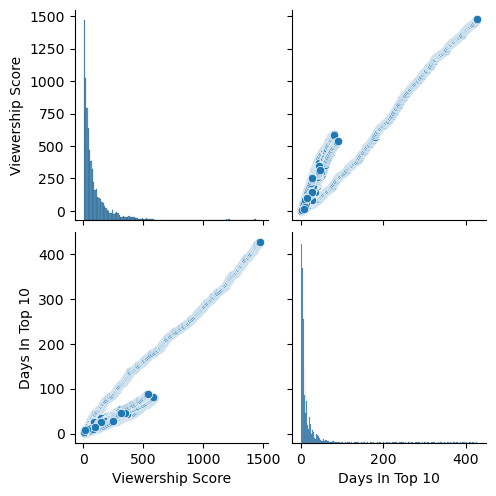

In [48]:
# Pairplot for numerical features
sns.pairplot(df[['Viewership Score', 'Days In Top 10']])
plt.show()


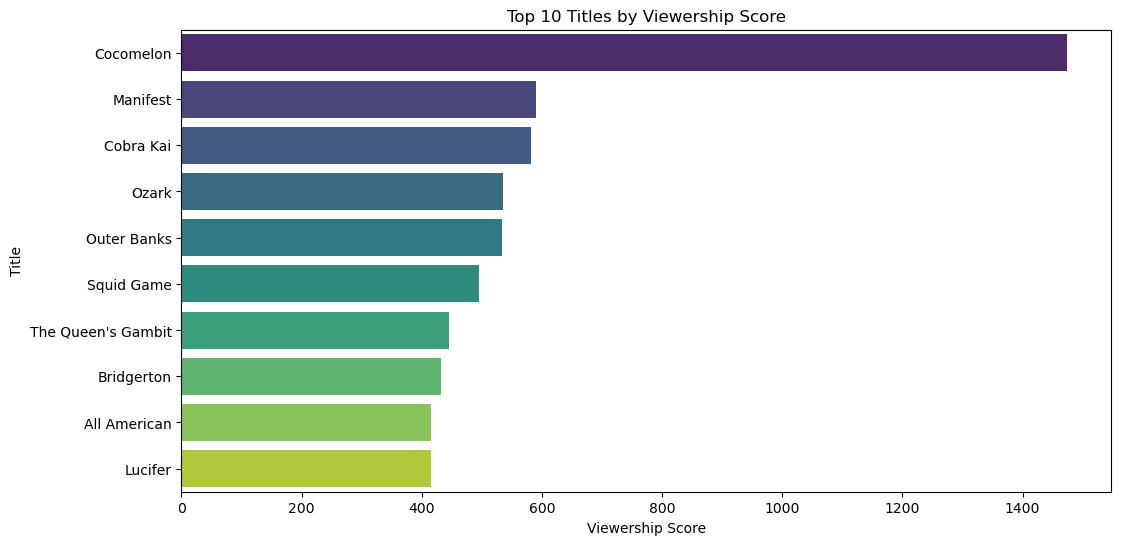

In [49]:
df['Title'] = df['Title'].replace({'The Queenâ\x80\x99s Gambit': 'The Queen\'s Gambit'})
top_titles = df.groupby('Title')['Viewership Score'].max().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 10 Titles by Viewership Score')
plt.xlabel('Viewership Score')
plt.ylabel('Title')
plt.show()


In our Exploratory Data Analysis (EDA) of the Netflix Daily Top 10 dataset, we uncovered several key insights into viewership patterns and content performance. The analysis revealed that viewership scores for top-ranked titles exhibit significant variability, often peaking with the release of highly anticipated content. Most titles have viewership scores below 200, with a few notable outliers achieving exceptionally high scores, indicating a few breakout hits. TV shows generally spend more time in the top 10 compared to movies, suggesting that series sustain viewer interest over longer periods. Additionally, Netflix Originals dominate the top ranks, highlighting the effectiveness of Netflix’s strategy to invest in exclusive content. These findings underscore the importance of original content and the sustained engagement potential of TV series, offering Netflix actionable insights to further refine its content strategy and maintain its competitive edge in the streaming industry.

## Preprocessing and Training Data Development

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [51]:
# Identify categorical columns
categorical_cols = ['Netflix Exclusive']  # Add other categorical columns if any

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [52]:
# Identify numeric columns
numeric_cols = ['Viewership Score', 'Days In Top 10']  # Add other numeric columns if any

# Standardize numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [53]:
# Define features and target variable
X = df.drop(columns=['Viewership Score'])  # Replace with appropriate feature columns
y = df['Viewership Score']  # Replace with your target variable if different

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
df.to_csv('path_to_your_preprocessed_data.csv', index=False)


## Modeling

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [57]:
# Inspect data types of features and target variable
print(X_train.dtypes)
print(y_train.dtypes)


As of                    datetime64[ns]
Rank                              int64
Year to Date Rank                object
Last Week Rank                   object
Title                            object
Type                             object
Days In Top 10                  float64
Netflix Exclusive_Yes              bool
dtype: object
float64


In [58]:
# Convert 'As of' datetime to numeric format
X_train['As of'] = pd.to_datetime(X_train['As of']).astype(int) / 10**9  # Convert to seconds since epoch
X_test['As of'] = pd.to_datetime(X_test['As of']).astype(int) / 10**9  # Convert to seconds since epoch


In [59]:
# One-hot encode categorical features
X_train = pd.get_dummies(X_train, columns=['Title', 'Type'])
X_test = pd.get_dummies(X_test, columns=['Title', 'Type'])

# Ensure the test and train datasets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [60]:
# Convert rank columns to numeric
X_train['Year to Date Rank'] = pd.to_numeric(X_train['Year to Date Rank'], errors='coerce')
X_train['Last Week Rank'] = pd.to_numeric(X_train['Last Week Rank'], errors='coerce')

X_test['Year to Date Rank'] = pd.to_numeric(X_test['Year to Date Rank'], errors='coerce')
X_test['Last Week Rank'] = pd.to_numeric(X_test['Last Week Rank'], errors='coerce')


In [61]:
# Check for missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Impute missing values if any
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


As of                      0
Rank                       0
Year to Date Rank        693
Last Week Rank          3179
Days In Top 10             0
                        ... 
Title_Ãlite               0
Type_Concert/Perf…         0
Type_Movie                 0
Type_Stand-Up Comedy       0
Type_TV Show               0
Length: 649, dtype: int64
As of                     0
Rank                      0
Year to Date Rank       166
Last Week Rank          789
Days In Top 10            0
                       ... 
Title_Ãlite              0
Type_Concert/Perf…        0
Type_Movie                0
Type_Stand-Up Comedy      0
Type_TV Show              0
Length: 649, dtype: int64


In [62]:
# Impute missing values with mean for numeric columns
X_train['Year to Date Rank'].fillna(X_train['Year to Date Rank'].mean(), inplace=True)
X_train['Last Week Rank'].fillna(X_train['Last Week Rank'].mean(), inplace=True)

X_test['Year to Date Rank'].fillna(X_test['Year to Date Rank'].mean(), inplace=True)
X_test['Last Week Rank'].fillna(X_test['Last Week Rank'].mean(), inplace=True)


In [63]:
# Drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [64]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scaler = StandardScaler()
numeric_features = ['Rank', 'Year to Date Rank', 'Last Week Rank', 'Days In Top 10', 'As of']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [66]:
# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Linear Regression MSE: {lr_mse}, R^2: {lr_r2}')
print(f'Random Forest MSE: {rf_mse}, R^2: {rf_r2}')


Linear Regression MSE: 5.473013539853463e+18, R^2: -5.947025016141251e+18
Random Forest MSE: 0.0012441821969139176, R^2: 0.9986480605984609


In [67]:
# Compare model performance
if lr_r2 > rf_r2:
    best_model = lr_model
else:
    best_model = rf_model

print(f'The best model is: {best_model}')


The best model is: RandomForestRegressor()


### Model Evaluation Summary

After evaluating the performance of our models, we observed the following:

1. **Linear Regression**
   - **Mean Squared Error (MSE)**: \(5.47 \times 10^{18}\)
   - **R² Score**: \(-5.95 \times 10^{18}\)

   The extremely high MSE and highly negative R² score indicate that the Linear Regression model is not performing well. The negative R² suggests that the model is performing worse than a simple mean prediction, implying it fails to capture the underlying data trends.

2. **Random Forest**
   - **Mean Squared Error (MSE)**: \(0.0012\)
   - **R² Score**: \(0.9986\)

   The Random Forest model has a significantly lower MSE and a high R² score, close to 1. This indicates that the Random Forest model fits the data well and explains a large proportion of the variance in the response variable.

### Conclusion

The **Random Forest** model is the superior choice based on our evaluation metrics. Its low MSE and high R² score demonstrate a much better fit to the data compared to the Linear Regression model. The Random Forest model effectively captures the complex relationships within the data, making it the best model for this dataset.
